## Задание

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


Распознайте рукописную цифру, написанную на листе от руки.
Последовательность шагов следующая:

*   На бумаге рисуем произвольную цифру (желательно нарисовать цифру размером не 
более 5 * 5 мм и без наклона. В занятии нейронка обучалась на цифрах американских студентов. Эти цифры были написаны на тетрадных листах в клетку и имели схожий размер).
*   Фотографируем. Загружаем фото в Collaboratory.
*   С помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загружаем картинку в переменную.
*   С помощью функции image.img_to_array(img) преобразуем изображение в numpy-массив.
*   Выполняем инверсию цветов, нормирование и решейп массива.
*   Выполняем распознавание собственной рукописной цифры.

Примечание: точность распознавания рукописных цифр может быть достаточно низкой, т.к. рукописные цифры после преобразований хоть и похожи на содержащиеся в базе, но могут отличаться по конфигурации, толщине линий и т.д.


In [4]:
# Ваше решение
import glob
from PIL import Image
import numpy as np
import os
import imageio
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import utils 
from tensorflow.keras.preprocessing import image 
import numpy as np
import os
import matplotlib.pyplot as plt 
from PIL import Image 

%matplotlib inline

In [5]:
# Путь к директории с базой
base_dir = './data/'
# Создание пустого списка для загрузки изображений обучающей выборки
x_train = []
# Создание списка для меток классов
y_train = []
# Задание высоты и ширины загружаемых изображений
img_height = 28
img_width = 28

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

# Перебор папок в директории базы
for patch in os.listdir(base_dir):
    # Перебор файлов в папках
    for img in os.listdir(base_dir + '/' + patch):
        # Добавление в список изображений текущей картинки
        image_ = imageio.imread(base_dir + '/' + patch + '/' + img)
        image_ = rgb2gray(image_)
        x_train.append(image_)
        # Добавление в массив меток, соответствующих классам
        if patch == '0':
            y_train.append(0)
        else:
            y_train.append(1)
# Преобразование в numpy-массив загруженных изображений и меток классов
x_train = np.array(x_train)
y_train = np.array(y_train)
# Вывод размерностей
print('Размер массива x_train', x_train.shape)
print('Размер массива y_train', y_train.shape)

Размер массива x_train (10, 28, 28)
Размер массива y_train (10,)


/tmp/ipykernel_62196/1593121268.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_ = imageio.imread(base_dir + '/' + patch + '/' + img)


In [6]:
y_train

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

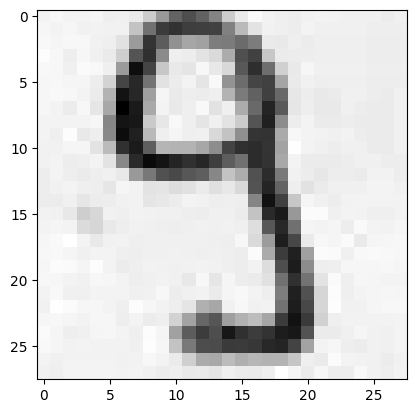

In [8]:
# Отрисовка картинки
n = np.random.randint(x_train.shape[0])

plt.imshow(x_train[n], cmap='gray')

# Вывод n-й картинки
plt.show()

In [54]:
x_train = x_train.reshape(x_train.shape[0], -1) 

# Проверка результата
x_train.shape

(10, 784)

In [55]:
# Нормализация входных картинок
# Преобразование x_train в тип float32 (числа с плавающей точкой) и нормализация
x_train = x_train.astype('float32') / 255.

In [56]:
# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train, 2)

In [57]:
# Проверка форрмы y_train
# 10 примеров, каждый длины 2 по числу классов
y_train.shape

(10, 2)

In [73]:
# Создание последовательной модели
model = Sequential()

# Добавление полносвязного слоя на 800 нейронов с relu-активацией
model.add(Dense(800, input_dim=784, activation='relu')) 

# Добавление полносвязного слоя на 400 нейронов с relu-активацией
model.add(Dense(400, activation='relu'))

# Добавление полносвязного слоя с количеством нейронов по числу классов с softmax-активацией
model.add(Dense(2, activation='softmax')) 

In [74]:
# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [75]:
model.fit(x_train,        # обучающая выборка, входные данные
          y_train,        # обучающая выборка, выходные данные
          batch_size=2, # кол-во примеров, которое обрабатывает нейронка перед одним изменением весов
          epochs=10,      # количество эпох, когда нейронка обучается на всех примерах выборки
          verbose=1)      # 0 - не визуализировать ход обучения, 1 - визуализировать

Epoch 1/10
5/5 [==============================] - 0s 6ms/step - loss: 1.1030 - accuracy: 0.5000
Epoch 2/10
5/5 [==============================] - 0s 6ms/step - loss: 0.8257 - accuracy: 0.3000
Epoch 3/10
5/5 [==============================] - 0s 5ms/step - loss: 1.1177 - accuracy: 0.6000
Epoch 4/10
5/5 [==============================] - 0s 6ms/step - loss: 0.7583 - accuracy: 0.7000
Epoch 5/10
5/5 [==============================] - 0s 5ms/step - loss: 0.7472 - accuracy: 0.5000
Epoch 6/10
5/5 [==============================] - 0s 7ms/step - loss: 0.5620 - accuracy: 0.6000
Epoch 7/10
5/5 [==============================] - 0s 6ms/step - loss: 0.8508 - accuracy: 0.5000
Epoch 8/10
5/5 [==============================] - 0s 6ms/step - loss: 0.6709 - accuracy: 0.5000
Epoch 9/10
5/5 [==============================] - 0s 5ms/step - loss: 0.3546 - accuracy: 1.0000
Epoch 10/10
5/5 [==============================] - 0s 6ms/step - loss: 0.3473 - accuracy: 0.9000


In [76]:
model.save_weights('pro_task_model.h5')
model.load_weights('pro_task_model.h5')